# 02 - Trend Prices Analysis
## Q: 2.1 "Berapa harga terkini untuk 10 komoditas pokok di 37 provinsi, dan bagaimana perbandingannya dengan rata-rata nasional?" 

---

# Setup

In [1]:
# Add project root to Python path
import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

print(f"📁 Project root: {project_root}")

📁 Project root: d:\nusantara_food


In [2]:
import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime, timedelta

from src.data_analysis.utils import load_data, save_csv, DataSaver, setup_plot_style
from src.data_analysis.config import PROCESSED_DIR, FIGURES_DIR

setup_plot_style()
%matplotlib inline

print("✅ Setup complete!")

✅ Setup complete!


# Configuration

In [ ]:
# User-selectable parameters
PROVINCE_FILTER = None  # Change this! Or set to None for all provinces
FOCUS_COMMODITIES = [
    'Beras', 'Daging Ayam', 'Telur Ayam', 
    'Minyak Goreng', 'Cabai Merah'
]  # Top 5 for clearer charts

print(f"📍 Province: {PROVINCE_FILTER or 'All Provinces'}")
print(f"🌾 Focus Commodities: {len(FOCUS_COMMODITIES)}")

📍 Province: All Provinces
🌾 Focus Commodities: 5


---
## Your Analysis Here

Use the cells below for your data extraction logic.

In [19]:
# Load data
print("\n" + "="*70)
print("QUESTION 2.1: 30-DAY TREND ANALYSIS")
print("="*70)

# Load summary statistics
with open(project_root / 'queries/q2_1_trend_30_days.sql', 'r') as f:
    query_summary = f.read()

# Add province filter if specified
if PROVINCE_FILTER:
    # Insert WHERE clause before ORDER BY
    query_summary = query_summary.replace(
        "ORDER BY",
        f"WHERE province_name = '{PROVINCE_FILTER}'\nORDER BY"
    )

df_30d_summary = load_data(query_summary)

print(f"\n✅ Loaded 30-day summary: {len(df_30d_summary)} commodities")
print(f"📅 Date range: {df_30d_summary['first_date'].min()} to {df_30d_summary['last_date'].max()}")

df_30d_summary.head()


QUESTION 2.1: 30-DAY TREND ANALYSIS


d:\nusantara_food\src\data_analysis\utils.py:110: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, self.conn)



✅ Loaded 30-day summary: 34 commodities
📅 Date range: 2025-11-03 to 2025-12-03


,province_name,commodity_name,category_code,first_date,last_date,days_with_data,price_start,price_end,avg_price_30d,min_price_30d,max_price_30d,change_abs,change_pct,trend_direction,stddev_price,volatility_cv,volatility_level,price_range_30d,range_pct
0,Aceh,Beras,cat_1,2025-11-03,2025-11-28,20,14600.0,14500.0,14462.5,13550.0,14600.0,-100.0,-0.68,Stable (±5%),218.77,1.51,Very Stable,1050.0,7.26
1,Bali,Beras,cat_1,2025-11-03,2025-11-28,20,15450.0,15400.0,15402.5,15300.0,15450.0,-50.0,-0.32,Stable (±5%),34.32,0.22,Very Stable,150.0,0.97
2,Banten,Beras,cat_1,2025-11-03,2025-11-28,20,15050.0,14950.0,15000.0,14950.0,15050.0,-100.0,-0.66,Stable (±5%),51.30,0.34,Very Stable,100.0,0.67
3,Bengkulu,Beras,cat_1,2025-11-03,2025-11-28,20,15500.0,15550.0,15482.5,15300.0,15550.0,50.0,0.32,Stable (±5%),63.40,0.41,Very Stable,250.0,1.61
4,DI Yogyakarta,Beras,cat_1,2025-11-03,2025-11-28,20,14200.0,14200.0,14200.0,14200.0,14200.0,0.0,0.00,Stable (±5%),0.00,0.00,Very Stable,0.0,0.00


In [ ]:
# Load time series data (30 days)
with open(project_root / 'queries/q2_1_trend_30_days_timeseries.sql', 'r') as f:
    query_timeseries = f.read()

if PROVINCE_FILTER:
    query_timeseries = query_timeseries.replace(
        "-- AND p.province_name = 'DKI Jakarta'",
        f"AND p.province_name = '{PROVINCE_FILTER}'"
    )

df_30d_ts = load_data(query_timeseries)
df_30d_ts['tanggal'] = pd.to_datetime(df_30d_ts['tanggal'])

print(f"✅ Loaded time series: {len(df_30d_ts)} data points")
print(f"🌾 Commodities: {df_30d_ts['commodity_name'].nunique()}")


d:\nusantara_food\src\data_analysis\utils.py:110: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, self.conn)


✅ Loaded time series: 1636 data points
🌾 Commodities: 10


In [ ]:
# Analysis - 30 days trend summary
print("\n📊 30-DAY TREND SUMMARY:")
print("\nTrend Direction:")
print(df_30d_summary['trend_direction'].value_counts())

print("\nVolatility Levels:")
print(df_30d_summary['volatility_level'].value_counts())

print("\nTop 5 Price Increases:")
top_increases = df_30d_summary.nlargest(5, 'change_pct')[
    ['commodity_name', 'change_pct', 'price_start', 'price_end']
]
print(top_increases.to_string(index=False))

print("\nTop 5 Price Decreases:")
top_decreases = df_30d_summary.nsmallest(5, 'change_pct')[
    ['commodity_name', 'change_pct', 'price_start', 'price_end']
]
print(top_decreases.to_string(index=False))


📊 30-DAY TREND SUMMARY:

Trend Direction:
trend_direction
Stable (±5%)     32
Falling (>5%)     2
Name: count, dtype: int64

Volatility Levels:
volatility_level
Very Stable    34
Name: count, dtype: int64

Top 5 Price Increases:
commodity_name  change_pct  price_start  price_end
         Beras        2.68      14950.0    15350.0
         Beras        1.46      17150.0    17400.0
         Beras        0.91      16400.0    16550.0
         Beras        0.59      17050.0    17150.0
         Beras        0.57      17450.0    17550.0

Top 5 Price Decreases:
commodity_name  change_pct  price_start  price_end
         Beras       -7.98      16300.0    15000.0
         Beras       -7.17      16050.0    14900.0
         Beras       -4.62      16250.0    15500.0
         Beras       -3.96      18950.0    18200.0
         Beras       -3.05      14750.0    14300.0


📍 Showing NATIONAL AVERAGE (all provinces aggregated)
✅ Plotting 37 data points
📅 Date range: 2025-11-03 00:00:00 to 2025-12-03 00:00:00
🎨 Saved figure: d:\nusantara_food\reports\figures\trend_30d_National_Avg.png


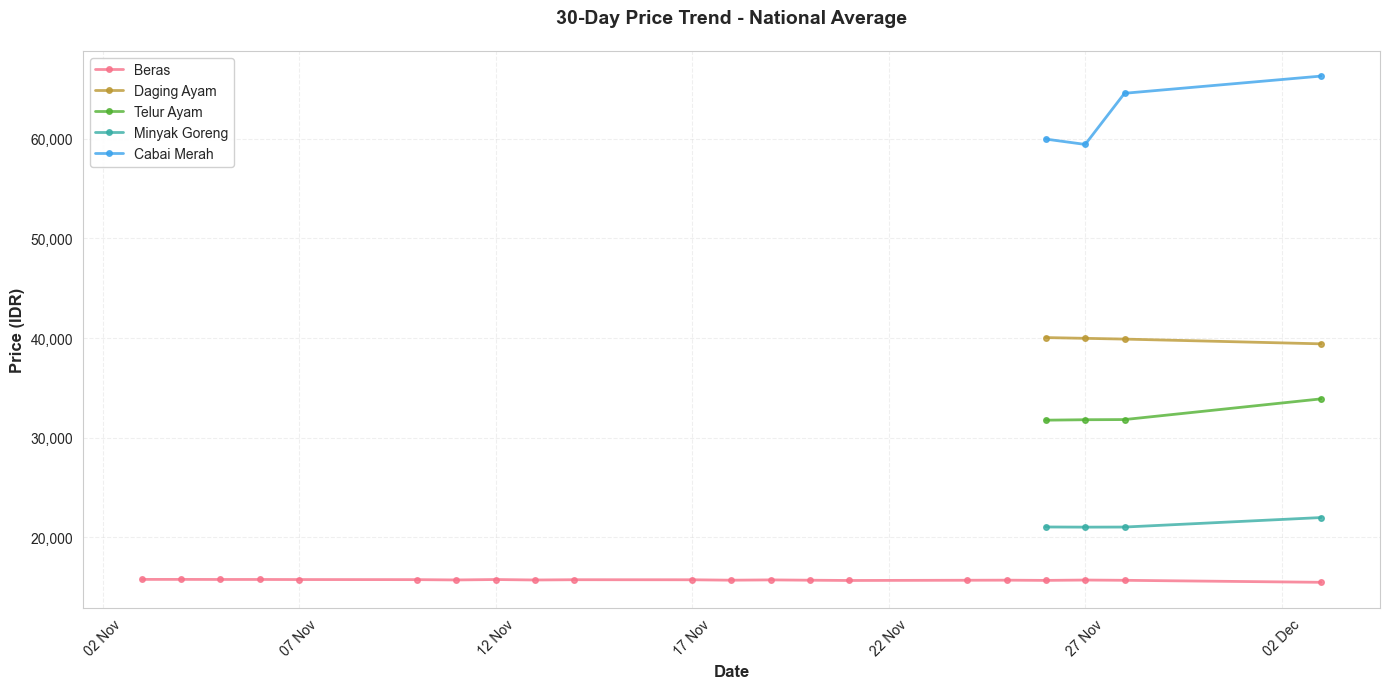


✅ Chart saved as: trend_30d_National_Avg.png


In [20]:
# Visualization 1 -Multi-line time series (30 days)

if PROVINCE_FILTER:
    print(f"📍 Showing data for: {PROVINCE_FILTER}")
    df_30d_plot = df_30d_ts[df_30d_ts['province_name'] == PROVINCE_FILTER].copy()
    title_suffix = PROVINCE_FILTER
else:
    print(f"📍 Showing NATIONAL AVERAGE (all provinces aggregated)")
    # Calculate national average per date per commodity
    df_30d_plot = df_30d_ts.groupby(['tanggal', 'commodity_name']).agg({
        'price': 'mean',  # National average
        'data_points': 'sum'
    }).reset_index()
    title_suffix = "National Average"

# Filter to focus commodities
df_30d_focus = df_30d_plot[df_30d_plot['commodity_name'].isin(FOCUS_COMMODITIES)].copy()

print(f"✅ Plotting {len(df_30d_focus)} data points")
print(f"📅 Date range: {df_30d_focus['tanggal'].min()} to {df_30d_focus['tanggal'].max()}")

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each commodity
for commodity in FOCUS_COMMODITIES:
    df_commodity = df_30d_focus[df_30d_focus['commodity_name'] == commodity]
    
    if not df_commodity.empty:
        # Sort by date to ensure proper line plotting
        df_commodity = df_commodity.sort_values('tanggal')
        
        ax.plot(
            df_commodity['tanggal'],
            df_commodity['price'],
            marker='o',
            markersize=4,
            linewidth=2,
            label=commodity,
            alpha=0.8
        )

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Price (IDR)', fontsize=12, fontweight='bold')

title = f'30-Day Price Trend - {title_suffix}'
ax.set_title(title, fontsize=14, fontweight='bold', pad=20)

ax.legend(loc='best', fontsize=10, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.xticks(rotation=45)

# Format y-axis with thousand separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()

saver = DataSaver()
filename = f'trend_30d_{PROVINCE_FILTER or "National_Avg"}.png'
saver.save_figure(fig, filename)
plt.show()

print(f"\n✅ Chart saved as: {filename}")
